In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'1.3.0'

In [5]:
helli = tf.constant("Hello, Tensorflow")

# Tensorflow의 구동원리

- Tensorflow는 tensor라고하는 데이터(edge)가 operation등이 들어있는 Node를 통해 흐른다고 하여 Tensorflow라고한다. 따라서 Edge와 Node가 있는 Graph로 작동한다.
- 따라서 위와같이 tf.constant를 해서 NOde를 만들더라도 단순히 print하여도 원하는 값이 나오지 않고,node의 실행을 위한 Session이 필요하다. 
- 따라서 먼저 Graph를 구성하고 Session을 통해서 Graph를 실행하는 것이 가장 큰 틀이라고 할 수 있다.


In [6]:
sess = tf.Session()
print(sess.run(helli))

b'Hello, Tensorflow'


In [7]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0)
node3 = tf.add(node1, node2)

In [8]:
print("node1 : ", node1, "node2 : ", node2, "node3 : ", node3)

node1 :  Tensor("Const_1:0", shape=(), dtype=float32) node2 :  Tensor("Const_2:0", shape=(), dtype=float32) node3 :  Tensor("Add:0", shape=(), dtype=float32)


In [9]:
sess = tf.Session()
print("sess.run(node1, node2): ", sess.run([node1, node2]))
print("sess.run(node3) : ", sess.run(node3))

sess.run(node1, node2):  [3.0, 4.0]
sess.run(node3) :  7.0


In [10]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b

print(sess.run(adder_node, feed_dict = {a: 3, b: 4.5}))
print(sess.run(adder_node, feed_dict = {a: [1, 3], b: [2, 4]}))

7.5
[ 3.  7.]


# 간단한 Linear Regression


## hypothesis and cost function
- H(x) = Wx + b
- minimize cost(W,b)

1. H(x) = Wx + b

In [11]:
# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

#Variable은 tensorflow가 사용하는 Variable이다
#tf.random_normal([1]) rank가 1인(scalar) 랜덤한 숫자를 만든다.
W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

#Our hypothesis XW + b
hypothesis = x_train * W + b

2. cost(W,b) = 1/m*summation(H(x)-y)^2

In [12]:
#cost/Loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

GradientDescent

In [13]:
#Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

In [14]:
# Launch the graph in a session
sess = tf.Session()
#Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

#fit the Line
for step in range(2001):
    sess.run(train)
    # 경사 하강법 20회에 한번씩 출력
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))

0 6.54487 [-0.23364004] [ 0.11562375]
20 0.0985823 [ 0.67440444] [ 0.48413622]
40 0.0365339 [ 0.77064908] [ 0.49699053]
60 0.0327002 [ 0.78913498] [ 0.47702435]
80 0.0296944 [ 0.79977876] [ 0.45492887]
100 0.0269689 [ 0.80925834] [ 0.43357962]
120 0.0244936 [ 0.81822908] [ 0.41320589]
140 0.0222455 [ 0.82677227] [ 0.39378703]
160 0.0202037 [ 0.83491337] [ 0.37528062]
180 0.0183494 [ 0.84267187] [ 0.35764381]
200 0.0166652 [ 0.85006571] [ 0.3408359]
220 0.0151356 [ 0.85711217] [ 0.32481781]
240 0.0137464 [ 0.86382729] [ 0.30955249]
260 0.0124847 [ 0.87022692] [ 0.29500473]
280 0.0113388 [ 0.87632579] [ 0.28114057]
300 0.0102981 [ 0.88213801] [ 0.26792803]
320 0.00935288 [ 0.88767707] [ 0.25533637]
340 0.00849441 [ 0.8929559] [ 0.24333647]
360 0.00771478 [ 0.89798647] [ 0.23190057]
380 0.00700668 [ 0.90278077] [ 0.2210021]
400 0.00636358 [ 0.90734977] [ 0.21061583]
420 0.0057795 [ 0.911704] [ 0.20071761]
440 0.00524903 [ 0.91585356] [ 0.19128463]
460 0.00476725 [ 0.91980815] [ 0.18229496

In [15]:
#placeholders를 사용해봅시다
#placeholders를 이용하면 먼저 알고리즘을 만들고 나중에 데이터를 집어넣기 용이하다. 
#Shape = [None]는 몇차원데이터든 상관없다 이경우 2
X = tf.placeholder(tf.float32, shape = [None])
Y = tf.placeholder(tf.float32, shape = [None])
W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

#Our hypothesis XW + b
hypothesis = X * W + b
#cost/Loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)


sess = tf.Session()
#Initializes global variables in the graph
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train], feed_dict={X: [1, 2, 3, 4, 5], Y: [2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 20 == 0:
        print(step, cost_val, W_val, b_val)
    

0 67.0786 [-0.27414393] [-1.08260274]
20 0.463493 [ 1.4319762] [-0.49020731]
40 0.403586 [ 1.41101515] [-0.38403329]
60 0.352455 [ 1.38413048] [-0.28683358]
80 0.307801 [ 1.35897362] [-0.19600879]
100 0.268805 [ 1.33546412] [-0.11113214]
120 0.23475 [ 1.31349432] [-0.03181414]
140 0.205009 [ 1.29296339] [ 0.04230924]
160 0.179036 [ 1.27377701] [ 0.11157823]
180 0.156353 [ 1.2558471] [ 0.17631073]
200 0.136544 [ 1.23909152] [ 0.23680383]
220 0.119245 [ 1.22343314] [ 0.2933352]
240 0.104138 [ 1.20880044] [ 0.34616432]
260 0.0909442 [ 1.19512582] [ 0.39553362]
280 0.0794222 [ 1.18234694] [ 0.44166976]
300 0.0693601 [ 1.17040491] [ 0.48478436]
320 0.0605727 [ 1.15924489] [ 0.52507526]
340 0.0528985 [ 1.14881575] [ 0.56272763]
360 0.0461967 [ 1.13906968] [ 0.59791404]
380 0.0403439 [ 1.12996185] [ 0.63079625]
400 0.0352326 [ 1.12145054] [ 0.66152477]
420 0.0307689 [ 1.11349666] [ 0.69024086]
440 0.0268707 [ 1.10606372] [ 0.71707636]
460 0.0234664 [ 1.0991174] [ 0.74215436]
480 0.0204933 [ 1

In [16]:
# testing our model
print(sess.run(hypothesis, feed_dict = {X: [5]}))
print(sess.run(hypothesis, feed_dict = {X: [2.5]}))
print(sess.run(hypothesis, feed_dict = {X: [1.5, 3.5]}))

[ 6.10074902]
[ 3.59940219]
[ 2.5988636  4.5999403]


# Minimizing Cost
- gradient descent

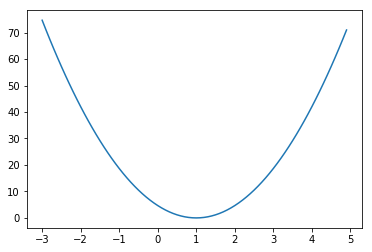

In [17]:
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]
W= tf.placeholder(tf.float32)
hypothesis = X * W
#cost function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
#Launch the graph in the graph
sess = tf.Session()
#Initialize global variables in the graph
sess.run(tf.global_variables_initializer())
#비용함수 그리기 위한 변수들을 위한 list 생성
W_val = []
cost_val = []
for i in range(-30, 50):
    #(-3,5)구간에서 plotting
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    
# 비용함수 plotting
plt.plot(W_val, cost_val)
plt.show()

## 경사하강법
경사를 이용하기 위해 미분한다

In [18]:
# W -= Learning_rate * derivative of cost function
W = tf.Variable(tf.random_normal([1]), name = 'weight')
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
#tensorflow 에서는 -=를 통해서 업데이트가 안되므로 assigin()이용
update = W.assign(descent)

## 전체 코드

In [20]:
x_data = [1, 2, 3]
y_data = [1, 2, 3]
W= tf.Variable(tf.random_normal([1]), name = 'weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
# our Hypothesis for linear model (simplified) X * W
hypothesis = X * W
# cost/ Loss Function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

#minimize 
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

#launch the graph in a session
sess = tf.Session()
# initialize global function variable in the graph
sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update, feed_dict = {X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

0 0.407299 [ 0.70457101]
1 0.115854 [ 0.84243786]
2 0.032954 [ 0.91596687]
3 0.00937358 [ 0.95518231]
4 0.00266626 [ 0.97609723]
5 0.000758407 [ 0.98725182]
6 0.000215727 [ 0.99320096]
7 6.13629e-05 [ 0.99637383]
8 1.74533e-05 [ 0.99806607]
9 4.96502e-06 [ 0.99896854]
10 1.4122e-06 [ 0.99944991]
11 4.01722e-07 [ 0.99970663]
12 1.14261e-07 [ 0.99984354]
13 3.24955e-08 [ 0.99991655]
14 9.24611e-09 [ 0.99995548]
15 2.62058e-09 [ 0.99997628]
16 7.45141e-10 [ 0.99998736]
17 2.12506e-10 [ 0.99999326]
18 5.96856e-11 [ 0.99999642]
19 1.69772e-11 [ 0.99999809]
20 4.9134e-12 [ 0.99999899]


## tensorflow에서의 GradientDescent

In [21]:
X = [1, 2, 3]
Y = [1, 2, 3]
W = tf.Variable(70.0)
hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))
#tensorflow에서는 메소드로 존재한다. 
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)
                        

sess = tf.Session()
sess.run(tf.global_variables_initializer())
                                
for step in range(100):
    print(step, sess.run(W))
    sess.run(train)

0 70.0
1 5.6
2 1.30667
3 1.02044
4 1.00136
5 1.00009
6 1.00001
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0


In [22]:
#tensorflow 안에서 grdient를 손대고 싶을 떄 사용하는 방법
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(5.)
hypothesis = X * W

#직접 구한 gradient값
gradient = tf.reduce_mean((W * X - Y) * X) * 2

cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)

#Gradient값을 얻는다.
gvs = optimizer.compute_gradients(cost)


#Gradient 적용
apply_gradient = optimizer.apply_gradients(gvs)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run([gradient, W, gvs]))
    sess.run(apply_gradient)

TypeError: Fetch argument None has invalid type <class 'NoneType'>